# Full Adder in Digital Logic

The Full Adder circuit in a classical computer has a similar function with the Half Adder with the difference being that the Full Adder can now add three inputs and produce two outputs. The two inputs are the same A and B inputs that the Half Adder sums. The third input is the CARRY-IN input. The two outputs are the SUM and the CARRY-OUT. Ofcourse this extra input is enough to make the Full Adder circuit way more complex than the Half Adder. The fact that the FA can receive carry information makes it a go-to when the need for a multi-bit multiplication arises.

Below you can see the truth table for a Full Adder:

![![image.png](https://media.geeksforgeeks.org/wp-content/uploads/1-77.png)](attachment:image.png)

The logical expressions for the outputs are:
- SUM = C-IN XOR (A XOR B) 
- CARRY-OUT = A B + B C-IN + A C-IN

Here is the implementaion of a Full Adder using Half Adders and an OR gate:

![![image-2.png](https://media.geeksforgeeks.org/wp-content/uploads/4-34.png)](attachment:image-2.png)
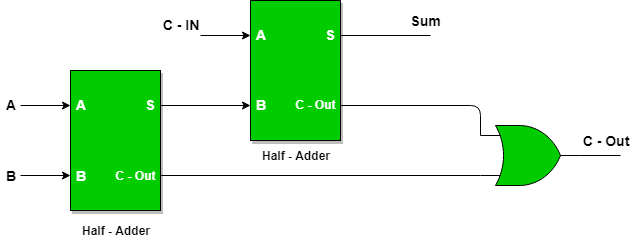
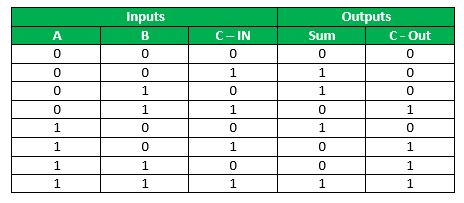

# Quantum Full Adder
Now the quantum implimentation is a bit more complex than the Half Adder. The amount of qubits used are four. The inputs A, B, the CARRY-IN that will output the SUM and an "empty" qubit that will output the CARRY-OUT.
The circuit that can create the same truth table as the one shown above can be seen in the image below:

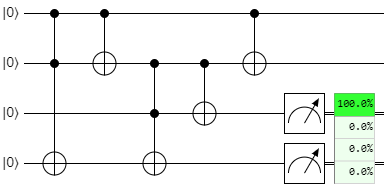


# Implementation in Qiskit

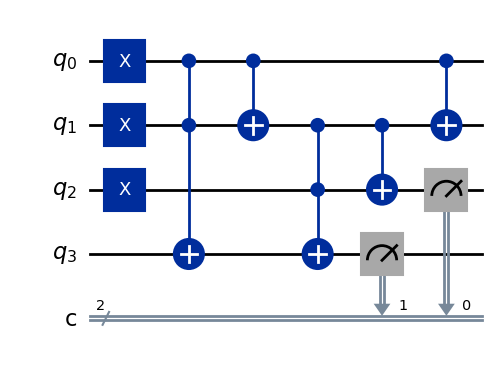

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create the QuantumCircuit
qc = QuantumCircuit(4, 2)

# Get user input for qubits A, B and CARRY-IN
input_a = int(input("Enter value for qubit A (0 or 1): "))
input_b = int(input("Enter value for qubit B (0 or 1): "))
input_cin = int(input("Enter value for qubit C-IN (0 or 1): "))

# Initialize qubits A, B and CARRY-IN based on user input
if input_a == 1:
    qc.x(0)  
if input_b == 1:
    qc.x(1) 
if input_cin == 1:
    qc.x(2)

# First Toffoli gate
qc.ccx(0,1,3)

# First Controlled X-Pauli gate
qc.cx(0,1)

# Second Toffoli gate
qc.ccx(1,2,3)

# Second Controlled X-Pauli gate
qc.cx(1,2)

# Third and last Controlled X-Pauli gate
qc.cx(0,1)

# Measurment of the results
qc.measure(2,0) # Measure qubit 2 (SUM) and assign it to bit 0
qc.measure(3,1) # Measure qubit 3 (CARRY-OUT) and assign it to bit 1

qc.draw(output='mpl')

# Running the circuit in a Quantum Computer

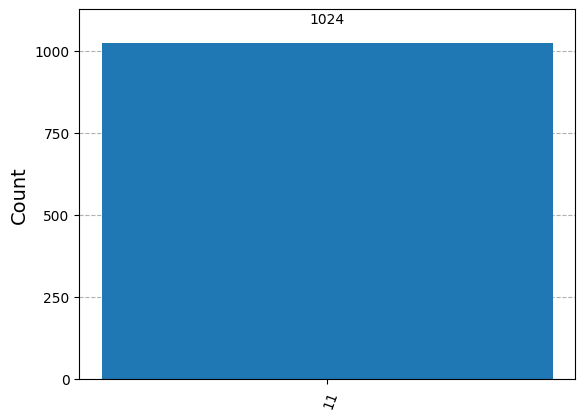

In [2]:
simulator = AerSimulator()
circ = transpile(qc, simulator)

result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)